x + 1
x**2/2 + x + 1
x**3/6 + x**2/2 + x + 1
x**4/24 + x**3/6 + x**2/2 + x + 1
x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


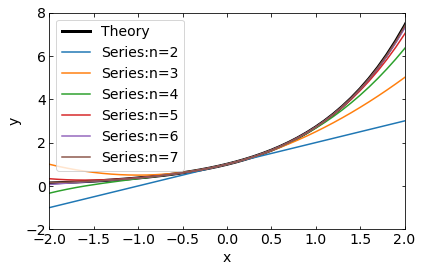

In [3]:
from sympy import*
import numpy as np
from matplotlib import pyplot as plt
 
# 理想波形を生成
cal_x = np.arange(-10.0, 10.1, 0.1)
cal_y = np.exp(cal_x)
 
# シンボルを定義
x = Symbol('x')
 
# 任意点周りのテイラー展開を精度違いで計算する
sol = []                                                # 結果の入れ物
a = 0                                                   # 任意点
for i in range(6):
    taylor = series(exp(x), x=x, x0=a, n=i+2).removeO() # removeO()で剰余項を除去する
    print(taylor)                                       # 式を表示させて確認
    taylor_y = lambdify(x, taylor, 'numpy')             # numpyの関数に変換
    sol.append(taylor_y(cal_x))                         # 関数に値を入れて曲線を計算
 
# ここからグラフ描画---------------------------------------------------
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
 
# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
 
# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
 
# 軸のラベルとスケールを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 8)
 
# データをプロットする。
ax1.plot(cal_x, cal_y, label='Theory', lw=3, color='black')
for j in range(len(sol)):
    ax1.plot(cal_x, sol[j], label='Series:n=' + str(j+2))
 
fig.tight_layout()
 
# グラフを表示する。
plt.legend()
plt.show()
plt.close()
# ---------------------------------------------------------------------